# https://habr.com/ru/companies/ods/articles/323890/

# Линейная регрессия

https://www.cs.princeton.edu/courses/archive/spring19/cos324/files/linear-regression.pdf

https://math.stackexchange.com/questions/1292444/what-does-the-2-in-xw-y-2-mean

https://math.stackexchange.com/questions/2014226/how-is-x2-related-to-xtx

https://habr.com/ru/articles/479398/

https://kstu.kg/fileadmin/user_upload/lecture4_machine_learning_orozobekova_a.k..pdf

## Постановка задачи

### Введение

Предположим, что между признаками объекта и целевой переменной существует линейная зависимость:
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Для удобства опустим свободный член $b$, заменив его добавлением к $x$ фиктивного признака равного 1. В этом случае формула примет упрощенный вид:
$$y = \langle w, x \rangle$$
где $\langle \cdot, \cdot \rangle$ - скалярное произведение векторов $w, x \in \mathbb{R}^n$

В матричной форме, когда у нас есть $m$ объектов формулу можно переписать следующим образом:
$$ y = Xw, $$
где $y$ - столлбец размера $n \times 1$, $X$ - матрица признаков размера $n \times m$, $w$ - вектор весов размера $m \times 1$

**Цель решения задачи линейной регрессии** - нахождение такой матрицы весов $w$, которая позволит наиболее точно приблизить $Xw$ к $y$. Для этого вводится **функция потерь** или **loss function**.

### Функция потерь

Функция потерь оценивает, насколько сильно расходится вектор реальных значений $y$ и вектор предсказаний $y_{pred}$. Так как в нашей задаче вектора живут в одном пространстве, то в качестве функции потерь можно выбрать расстояние между векторами или **L2-норму** разницы векторов (Евклидово расстояние):

$$
\begin{aligned}
L(y_{pred}, y) &= ||y_{pred} - y||_2
\end{aligned}
$$

Однако такая функция ошибки не учитывает размер выборок, поэтому модифицируем её множителем $1/n$, возведём в квадрат и получим **среднеквадратическое отклонение** или **MSE**:


$$
\begin{aligned}
L(y_{pred}, y) &= \frac{1}{n}||y_{pred} - y||^2_2
\end{aligned}
$$

Особенность MSE в том, что она является *функционалом* - получает на вход функцию, а на выходе выдаёт число, которое мы хотим **минимизировать**. Такая постановка функции потерь аналогична [**методу наименьших квадратов**](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2), что в условиях [теоремы Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0) является оптимальным подходом. Так же минимизация среднеквадратичной ошибки это то же самое, что и *максимизация правдоподобия данных*.

### Минимизация функции потерь.

[Выведем аналитическое решение минимизации функции потерь](https://en.wikipedia.org/wiki/Linear_regression). Минимум фунцкии находится в точке, где градиент этой функции относительно искомой переменной обращается в ноль. Сначала раскроем функцию потерь:

$$
\begin{aligned}
L(y_{pred}, y) = \frac{1}{n} ||y_{pred} - y||^2_2 = \frac{1}{n}||Xw - y||^2_2 = \frac{1}{n}(Xw - y)^T(Xw - y) = \frac{1}{n}( w^T X^TXw - y^TXw - w^T X^Ty  + Y^Ty) =  \\ 
 = | w^TB^TA = A^TBw | =\frac{1}{n}(w^TX^TXw - 2y^TXw + Y^Ty),
\end{aligned}
$$
используя следующие свойства:
$$
||x||^2_2 = (\sqrt{\langle x, x\rangle})^2 = x^Tx
$$
$$
(AB)^T = B^T A^T
$$

Оптимальное решение относительно $w$ находится в точке, в которой градиент равен нулю. Получим его, используя [свойства получения производных матриц](https://en.wikipedia.org/wiki/Matrix_calculus#Identities):

$$
\begin{aligned}
\frac{\partial{L}}{\partial{w}} = \frac{\partial{}}{\partial{w}} \frac{1}{n}(w^TX^TXw - 2y^TXw + y^Ty) = \frac{2}{n}(X^TXw - X^Ty) 
\end{aligned}
$$

Или в краткой форме

$$
\begin{aligned}
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}X^T(y_{pred} - y) \,\, \in \mathbb{R}^{m \times 1}
\end{aligned}
$$

Приравняем его к нулю и выразим $w$:

$$
\frac{2}{n}(X^TXw - X^Ty) = 0
$$
$$
X^TXw = X^Ty
$$
$$
w = (X^TX)^{-1} X^Ty
$$

Реализуем и проверим это решение, но сначала импортируем библиотеки, опишем константы и функции.

## Реализация в коде

### Импорт библиотек, описание констант и функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [2]:
RANDOM_STATE = 1

np.random.seed(RANDOM_STATE)

In [3]:
def results_metrics_weights(model, X, y, y_pred):

    print('Веса модели:', [x.round(4) for x in model.get_weights()])
    print('MSE: ', mean_squared_error(y, y_pred).round(4))

In [4]:
def results_graph(model, X, y_real, y_pred, func_real):

    plt.figure(figsize=(8, 3))
    plt.scatter(X, y_real, c='orange')
    
    plt.plot(X, func_real, label='real', c='g')
    plt.plot(X, y_pred, label='predicted', c='r')
    
    plt.ylabel('Целевая переменная')
    plt.xlabel('Признак')
    plt.title('График заданной и полученной зависимостей')
    plt.grid(alpha=0.2)
    plt.legend()
    
    plt.show()

In [5]:
def losses_graph(model):
    plt.figure(figsize=(8, 3))
    
    plt.plot(model.get_losses())
    
    plt.title('Gradient descent learning')
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.ylim(bottom=0)
    plt.grid(alpha=0.6)
    
    plt.show()

### Реализация аналитического решения

In [6]:
class MyLinearRegression:

    def __init__(self, **kwargs):
        pass
        self.w = None
        
    def fit(self, X, y):
        n, _ = X.shape
        
        X_train = np.hstack((X, np.ones((n, 1))))
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        n, _ = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))
        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [7]:
def linear_expression(x, a=1, b=1):
    return a * x + b

Целевую переменную создадим на основе признака, домножив его на $3$ и добавив $7$. Это и будут наши коэффиценты, эти же числа мы и хотим получить в матрице $w$.

In [8]:
objects_num = 100

X = np.linspace(-5, 5, objects_num)
target_3_7 = linear_expression(X, 3, 7)
y = target_3_7 + np.random.randn(objects_num) * 5
X = X.reshape(-1, 1)

In [9]:
model_analytic = MyLinearRegression()
model_analytic.fit(X, y);
pred_analytic = model_analytic.predict(X)

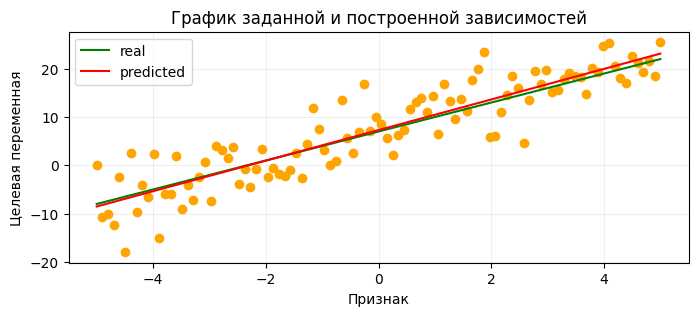

In [10]:
results_graph(model_analytic, X, y, pred_analytic, target_3_7)

In [11]:
results_metrics_weights(model_analytic, X, y, pred_analytic)

Веса модели: [3.1654, 7.3029]
MSE:  19.3549


## Проблема аналитического решения

Основная проблема в обращении матрицы — это то, [что вычислительно обращать большие матрицы дело сложное](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution), а мы бы хотели работать с датасетами, в которых у нас могут быть миллионы точек. Вычислительная сложность аналитического решения — $O(D^2N+D^3)$, где, $N$ – длина выборки, $D$ – число признаков у одного объекта.
Кроме того, обратная матрица $(X^TX)^{-1}$ может быть [вырождена или плохо обусловлена](https://alexanderdyakonov.wordpress.com/2019/10/31/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/) в случае, когда столбцы $X$ имеют некоторую степень корреляции, что приведёт к тому, что матрица коэффицентов $w$ станет чувствительной к шуму и случайным ошибкам, и, как следствие, к неадэкватным коэффициентам. 

В связи с этим применяют метод **градиентного спуска**.


### Градиентный спуск

Этапы градиентного спуска:

1. Расчет $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- градиента ошибки (значение целевой функции, то есть лосса $L(y_{pred}, y_{true})$) от значения параметров модели (весов $w$)
2. Шаге спуска -- изменении весов $w$ в сторону антиградиента с некоторым коэффициентом $\alpha$ (он же learning rate):
$$w = w - \alpha\frac{\partial{L}}{\partial{w}}$$
3. Повторение п.1 и п.2 пока не наблюдается сходимость (изменения ошибки малы или отсутсвуют), либо пока не достигнуто максимальное число иттераций.

В нашем случае:
$$
\begin{aligned}
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}X^T(Xw - Y)
\end{aligned}
$$

Общие замечания:
* Поскольку задача выпуклая, выбор начальной точки влияет на скорость сходимости, но не настолько сильно, чтобы на практике нельзя было стартовать всегда из нуля или из любой другой приятной вам точки;
* Число обусловленности матрицы существенно влияет на скорость сходимости градиентного спуска: чем более вытянуты эллипсоиды уровня функции потерь, тем хуже;
* Темп обучения тоже сильно влияет на поведение градиентного спуска; вообще говоря, он является гиперпараметром алгоритма, и его, возможно, придётся подбирать отдельно. Другими гиперпараметрами являются максимальное число итераций и/или порог tolerance.
 
Вычислительная сложность градиентного спуска – $O(NDS)$, где, как и выше, $N$ – длина выборки, $D$ – число признаков у одного объекта, $S$ - число иттераций.

### Реализация градиентного спуска

In [12]:
class MyGradientLinearRegression():
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.losses = []
        n, m = X.shape
        self.w = np.random.randn(m + 1)
        X_train = np.hstack((X, np.ones((n, 1))))

        for _ in range(self.n_iter):
            y_pred = self.predict(X)
            grad = (2/n) * self._calc_gradient(X_train, y, y_pred)
            self.w -= self.lr * grad
            self.losses.append(mean_squared_error(y_pred, y))

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = np.dot(X.T, (y_pred-y))
        return grad

    def predict(self, X):
        n, _ = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))
        y_pred = X_train @ self.w

        return y_pred

    def get_losses(self):
        return self.losses

    def get_weights(self):
        return self.w

In [13]:
model_gradient = MyGradientLinearRegression(lr=0.02)
model_gradient.fit(X, y);
pred_gradient = model_gradient.predict(X)

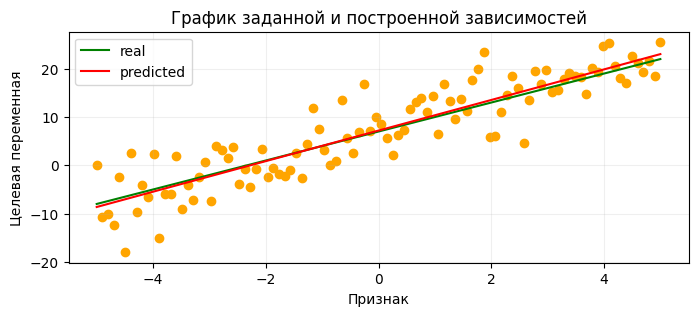

In [14]:
results_graph(model_gradient, X, y, pred_gradient, target_3_7)

In [15]:
results_metrics_weights(model_gradient, X, y, pred_gradient)

Веса модели: [3.1654, 7.2004]
MSE:  19.3654


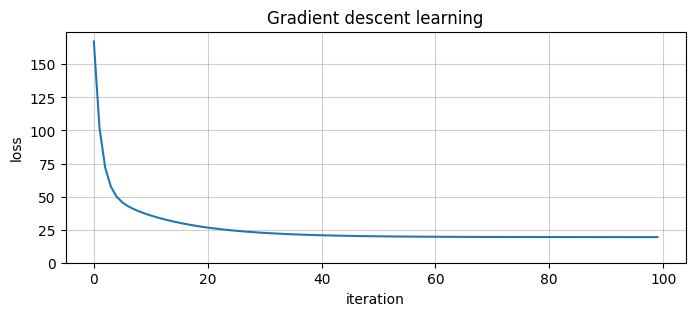

In [16]:
losses_graph(model_gradient)

На каждой иттерации нам нужно загрузить в память и обработать сразу всю выборку.  Возникает идея заменить градиент его оценкой на подвыборке.

## SGD

<img src="https://yastatic.net/s3/ml-handbook/admin/1_7_4b8031112e.png" width="800" height="790">

Для реализации `SGD` будем случано выбирать `n_sample` элементов из тренировочной выборки. Однако наиболее оптимальный подход - перемешиванеи выборки изначально, и далее получение индексов подвыборки линейным проходом.

Сложность по времени – $O(NDE)$, где - $E$ - количество эпох в случае с линейм проходом по индексам.

In [17]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        grad = np.dot(X[inds].T, (y_pred[inds] - y[inds]))
        return grad

In [18]:
model_SGD = MySGDLinearRegression()
model_SGD.fit(X, y);
pred_gradient = model_SGD.predict(X)

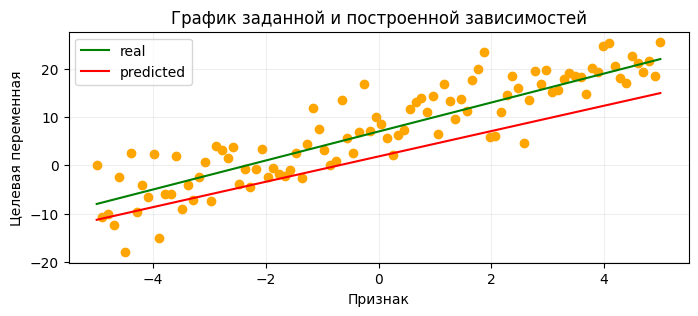

In [19]:
results_graph(model_SGD, X, y, pred_gradient, target_3_7)

In [20]:
results_metrics_weights(model_SGD, X, y, pred_gradient)

Веса модели: [2.6238, 1.8416]
MSE:  51.6749


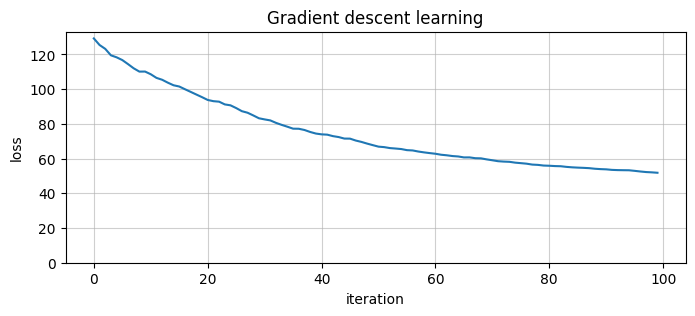

In [21]:
losses_graph(model_SGD)

## Bias–variance tradeoff

### Постановка проблемы

Первая проблема алгоритмов машинного обучения, которую можно сформулировать уже на этом этапе: [дилемма смещения-дисперсии](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). Продемонстрируем её.

Цель машинного обучения - нахождение функции $\hat{f}$, которая аппроксимирует реальную функцию $f(x)$ настолько хорошо, насколько это возможно. Однако обычно мы имеем дело не с реальной функией $f$, а с целевой переменной $y$, которая помимо реальной функции $f$ включается в себя некоторый шум $\epsilon$ обладающий свойствами $E[\epsilon]=0$ и $Var(\epsilon)=\sigma^2$, то есть $y = f + \epsilon$. Таким образом оценка "настолько хорошо, насколько это возможно" характеризуется среднеквадратичной ошибкой между $y$ и $\hat{f}(x)$. Разложим эту ошибку.

### Bias–variance decomposition

Для нашей задачи линейной регрессии ожидаемая квадратичная ошибка прогноза составляет:

$$
\begin{aligned}
Err = E[(y - \hat{f})^2] = E[y^2] - 2E[y\hat{f}] + E[\hat{f}^2]
\end{aligned}
$$

Разложим каждое слагаемое:

$$
\begin{aligned}
E[y^2] = E[(f + \epsilon)^2] = E[f^2] + 2E[f\epsilon] + E[\epsilon^2] = f^2 + 2f*0 + \sigma^2 = f^2 + \sigma^2
\end{aligned}
$$

$E[f^2] = f^2$ исходя из детерминированности $f$,  
$E[\epsilon] = 0$ из определения шума,  
$E[\epsilon^2] = \sigma^2$, так как $Var(x) = E[x^2] - E[x]^2 = E[x^2] = \sigma^2$ при $E[x] = 0$.

$$
\begin{aligned}
E[y\hat{f}] = E[(f + \epsilon)\hat{f}] = E[f\hat{f}] + E[\epsilon\hat{f}] = E[f\hat{f}] + E[\epsilon]E[\hat{f}] = fE[\hat{f}]
\end{aligned}
$$

$$
\begin{aligned}
E[\hat{f}^2] = Var(\hat{f}) + E[\hat{f}]^2
\end{aligned}
$$

Соберём все вместе

$$
\begin{aligned}
Err = f^2 + \sigma^2 - 2fE[\hat{f}] + Var(\hat{f}) + E[\hat{f}]^2 = (f - E[\hat{f}])^2 + Var(\hat{f})+ \sigma^2 = (E[f] - E[\hat{f}])^2 + Var(\hat{f})+ \sigma^2 = \\
&= Bias[\hat{f}]^2 + Var(\hat{f})+ \sigma^2
\end{aligned}
$$

Три члена представляют:

* квадрат смещения метода обучения, который можно рассматривать как ошибку, вызванную упрощением предположений, принятых в методе. Например, когда применяется аппроксимация нелинейной функции $f$ при использовании метода обучения для линейных, будет появляться ошибка в $\hat{f}$ как результат такого допущения;
* дисперсия метода обучения, или, интуитивно, как далеко от среднего значения метод $\hat{f}$ будет давать предсказания;
* неустранимая ошибка $\sigma^2$.

Поскольку все три величины неотрицательны, они формируют нижнюю границу ожидаемой ошибки на неизвестных данных.

Для упрощения вывода было принято допущение, которое сейчас стоит озвучить. На самом деле функция $\hat{f}$ это функция от двух переменных: невиденные до этого (тестовые) признаки $x$ и тренировочные данные $D$, так как они влияют на вид этой функции. То есть показывает, насколько смещается мат ожидание фунцкции при изменении тренировочных данных от мат ожидания реальной функции, а $Var$ показывает разброс предасказаний при изменении тренировочных данных. $Bias$ - функция от $\hat{f}$ и $f$, $Var$ - функция от $f$.

Wiki:  
Выбираемая модель должна, с одной стороны, точно уловить все закономерности в обучающих данных, а с другой стороны — обобщить закономерности на неизвестные данные. К сожалению, обычно это невозможно сделать одновременно. Методы обучения с высокой дисперсией могут хорошо представлять тренировочный набор, но имеют риск быть переобученными для данных с шумом или непрезентативных данных. В отличие от них, алгоритмы с низкой дисперсией обычно дают более простые модели, не склонно к переобучению, но может оказаться недообученным, что приводит к пропуску важных свойств.

Модели с малым смещением обычно более сложны (например, в них регрессионные многочлены имеют более высокий порядок), что позволяет им представлять тренировочное множество более точно. Однако они могут иметь большую компоненту шуматренировочного набора, что делает предсказание менее точным вопреки добавленной сложности. Для контраста, модели с высоким смещением относительно более просты (имеют многочлены меньшего порядка или даже линейные), но могут давать низкую дисперсию предсказаний, если применяются вне тренировочного набора.

Yandex:  
Смещение показывает, насколько хорошо с помощью данного алгоритма можно приблизить истинную зависимость
, а разброс характеризует чувствительность алгоритма к изменениям в обучающей выборке. Например, деревья маленькой глубины будут в большинстве случаев иметь высокое смещение и низкий разброс предсказаний, так как они не могут слишком хорошо запомнить обучающую выборку. А глубокие деревья, наоборот, могут безошибочно выучить обучающую выборку и потому будут иметь высокий разброс в зависимости от выборки, однако их предсказания в среднем будут точнее. 

Соотношение сложности модели со смещением и дисперсией [выражается следующим графиком](https://scott.fortmann-roe.com/docs/BiasVariance.html):

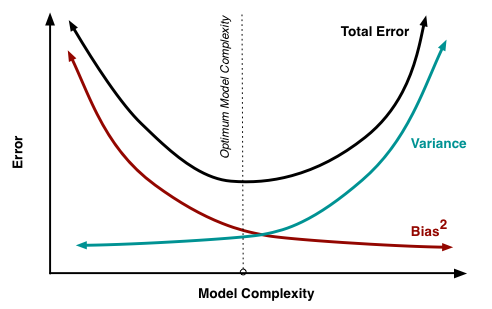

Оптимальная точка

$$
\begin{aligned}
\frac{\partial{Bias}}{\partial{Complexity}} = - \frac{\partial{Variance}}{\partial{Complexity}} 
\end{aligned}
$$

### Одно из решений

Бэггинг (Bootstrap Aggregating) и другие методы ресэмплинга могут быть использованы для снижения дисперсии в прогнозах модели. В бэггинге, создается множество репликатов исходного набора данных путем случайного выбора с возвращением. Каждый производный набор данных затем используется для построения новой модели, и эти модели собираются в ансамбль. Для получания прогноза все модели в ансамбле опрашиваются, и их результаты усредняются.

Одним из мощных алгоритмов моделирования, который хорошо использует бэггинг, являются Случайные Леса (Random Forests). Случайные Леса работают путем обучения множества деревьев решений, каждое из которых основано на различном ресэмплинге исходных данных обучения. В Random Forests смещение полной модели эквивалентно смещению одиночного дерева решений (которое само по себе имеет высокую дисперсию). Создавая много таких деревьев, в сущности "лес", а затем усредняя ихможно добиться значительного снижения дисперсии а по сравнению с одиночным деревом. На практике единственным ограничением на размер леса является время вычислений, поскольку бесконечное количество деревьев могло бы быть обучено без увеличения смещения и с постоянным (асимптотически убывающим) уменьшением дисперсии.

## Регуляризация

### Постановка проблемы

Пусть в выборке есть линейно зависимые признаки. Тогда существует вектор $v$, что для любого объекта $x$ выполнено $\langle v, x \rangle$ = 0. Допустим, мы нашли оптимальный вектор весов $w$ для линейного классификатора. Но тогда классификаторы с векторами весов $w+αv$ будут давать точно такие же ответы на всех объектах, поскольку $\langle w + αv, x \rangle$ = $\langle w , x \rangle$ + $α\langle v , x \rangle$ = $\langle w , x \rangle$. Проиллюстрируем.

В матрице $ \begin{bmatrix} 1 & 1 & 2 \\\ 0 & 2 & 4 \\\ -5 & 3 & 6 \\\ 3 & 1 & 2 \end{bmatrix}$ второй и третий столбцы линейнозависимы с коэффициентом 2. Тогда вектор $v$ $ \begin{bmatrix} 0\\\ -2*a \\\ a\end{bmatrix}$ будет давать результат $ \begin{bmatrix} 1*0 & 1*(-2a) & 2*a \\\ 0*0 & 2*(-2a) & 4*a \\\ -5*0 & 3*(-2a) & 6*a \\\ 3*0 & 1*(-2a) & 2*a \end{bmatrix}$ = $ \begin{bmatrix} 0 \\\ 0 \\\ 0 \\\ 0 \end{bmatrix}$

Так же можно сказать, что $L(w)$ "распремляется", и её минимум повышает размерность на количество коллинеарностей. Для двумерной поверхности весов минимум станет не точкой, а прямой (смотри в приложении). 


Всё это значит, что матрица весов не только не единственная, но ещё и может быть со сколько угодно большими весами. Такие решения не очень хороши, поскольку классификатор будет чувствителен к крайне маленьким изменениям в признаках объекта, а значит, переобучен. Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами.

При этом определитель матрицы $X^TX$ будет равен нулю (легко проверить на приведённой выше матрице), то есть матрица будет вырожденной. Однако на практике чистая линейная зависимость между признаками встречается редко, но мы можем наблюдать так называемую *мультиколлинеарность* — когда два или несколько признаков сильно коррелированы, в матрице $X$. Например, в задаче прогнозирования цены квартиры по ее параметрам "почти" линейная зависимость будет у признаков "площадь с учетом балкона" и "площадь без учета балкона". Формально для таких данных матрица $X^T X$ будет обратима, но из-за мультиколлинеарности у матрицы $X^T X$ некоторые собственные значения будут близки к нулю, а в обратной матрице $\left(X^T X\right)^{-1}$ появятся экстремально большие собственные значения, т.к. собственные значения обратной матрицы – это $\frac{1}{\lambda_i}$. Например если к третьему столбцу указанной выше матрицы добавить $0.1$, чем нарушить линейную зависимость столбцов, но при этом сохранить мультиколлинеарность, то собственные числа для $X^TX$ равны $(23.737, 0.00019, 89.102)$ (причём здесь собственные значения рекомендуется подумать самостоятельно). Итогом такого шатания собственных значений станет нестабильная оценка параметров модели, т.е. добавление нового наблюдения в набор тренировочных данных приведёт к совершенно другому решению.

In [22]:
np.random.seed(RANDOM_STATE) # нужно зафиксировать в ячейке, для повторяемости результатов

n = 100

X1 = np.random.randint(0, 100, n)
X2 = X1 + np.random.normal(0, 0.001, n)
X3 = np.random.randint(0, 100, n)

y = 3*X1 + 2*X2 + X3 + np.random.randint(0, 10, n)
X = np.column_stack((X1, X2, X3))

In [23]:
model_analytic_reg = MyLinearRegression()
model_analytic_reg.fit(X, y);
pred_analytic_reg = model_analytic_reg.predict(X)

In [24]:
results_metrics_weights(model_analytic_reg, X, y, pred_analytic_reg)

Веса модели: [205.025, -200.0272, 0.987, 5.0696]
MSE:  8.6383


In [25]:
model_gradient_reg = MyGradientLinearRegression(lr=0.0001, n_iter=100)
model_gradient_reg.fit(X, y);
pred_gradient_reg = model_gradient_reg.predict(X)

In [26]:
results_metrics_weights(model_gradient_reg, X, y, pred_gradient_reg)

Веса модели: [2.5334, 2.5111, 1.0438, -0.6936]
MSE:  12.7288


Видно, что коэффициенты аналитического решения получаются неадэкватными, однако градиентное решение показывает более приемлимые коэффициенты. При этом для него пришлось подбирать *learning_rate*, из-за того, что градиенты в ходе обучения принимали бесконечные значения. Это происходит из-за того, что вообще говоря веса и градиент функции потерь (и тем более сами значения функции потерь, которые являются квадратичной функцией от весов и признаков) - величины скорее разного масштаба, которые как раз и согласуются с помощью *learning_rate*. Получается, если признаки будут иметь разные масштабы, то каждому из них может потребоваться свой *learning_rate* для гладкого перемещения градиента по поверхности функции ошибки, что не очень удобно. Для решения этой проблемы используют **масштабирование признаков**, но об этом чуть позже. А пока вернёмся к некорректным весам моделей.

Эта проблема специфична для линейных моделей, однако регуляризация так же помогает бороться с переобучением, штрафуя модель за большие значения весов, то есть за сложность. Почему это так, [это хороший отдельный большой вопрос](https://stats.stackexchange.com/questions/188092/why-do-smaller-weights-result-in-simpler-models-in-regularization).

Теперь мы можем сформулировать решение этой проблемы.

### Решение

Мы хотим штрафовать модели за большие веса. Для этого введём в уравнение функции ошибки дополнительный *регуляризационный член*, который будет увеличивать ошибку пропорционально увеличению весов по модулю с некоторым *коэффициентом регуляризации*:

$$
\begin{aligned}
L(w) = ||Xw - Y||^2_2 + \lambda||w||^k_k,
\end{aligned}
$$
где $\lambda$ - гиперпараметр, отвечающий за степень регуляризации.

Коэффициент $\lambda$ является гиперпараметром модели и достаточно сильно влияет на качество итогового решения. Его подбирают по логарифмической шкале (скажем, от 1e-2 до 1e+2), используя для сравнения моделей с разными значениями $\lambda$ дополнительную валидационную выборку. Отдельно надо договориться о том, что вес $w0$, соответствующий отступу от начала координат (то есть признаку из всех единичек), мы регуляризовать не будем, потому что это не имеет смысла: если даже все значения $w0$ равномерно велики, это не должно портить качество обучения.

Различают следующие виды регуляризации:
- $l_1$-регуляризацию (LASSO, least absolute shrinkage and selection operator), учитывание $||w||_1$
- $l_2$-регуляризацию (Ridge), учитывание $||w||^2_2$
- Elastic net - комбинация двух предыдущих (учитываются обе нормы весов)

Аналитическое решение задачи Lasso регрессии в общем случае не находится. Для Ridge пойдём привычным путём - прировняем градиент функции потерь по $w$ к нулю:

$$
\begin{aligned}
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}(X^T(Xw - y) + \lambda w) = 0
\end{aligned}
$$

И выразим $w$:

$$
\begin{aligned}
w = (X^TX + \lambda E)^{-1}X^Ty
\end{aligned}
$$

Отметим, что за этой формулой стоит и понятная численная интуиция: раз матрица $X^TX$ близка к вырожденной, то обращать её сродни самоубийству. Мы лучше слегка исказим её добавкой $\lambda E$, которая увеличит все собственные значения на $\lambda$, отодвинув их от нуля. Да, аналитическое решение перестаёт быть «точным», но за счёт снижения численных проблем мы получим более качественное решение, чем при использовании «точной» формулы. Так же имеется мнение, что название "регуляризация" произшло именно от этого действия - приведения $X^TX$ к регулярному виду.

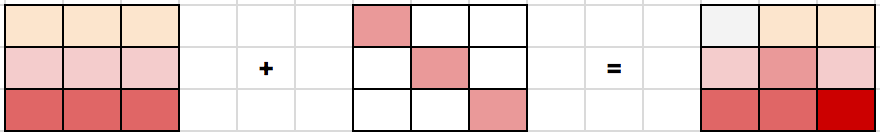

В ходе преобразований добавилась единичная матрица $E$, от которой и произошло название "Ridge" - гребневая. Из градиента функции потерь видно, почему не существует аналитического решения для LASSO - производная $\lambda||w||_1$ даёт $\lambda sign(w)$, что и не позволяет решить задачу в явном виде.
Теперь имплиментируем в коде градиентное решение (аналитическое не будем), наследовав класс `MyGradientRidge` от класса `MyGradientLinearRegression` и добавив регуляризацию Ridge к оптимизационному алгоритму.

In [27]:
class MyGradientRidge(MyGradientLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.alpha = alpha

    def _calc_gradient(self, X, y, y_pred):

        lambdaE = self.alpha * np.eye(self.w.shape[0])
        lambdaE[-1, -1] = 0
        grad = np.dot(X.T, (y_pred-y)) + np.dot(lambdaE, self.w)
        return grad

In [28]:
objects_num = 100

X = np.linspace(-5, 5, objects_num)
target_3_7 = linear_expression(X, 3, 7)
y = target_3_7 + np.random.randn(objects_num) * 5
X = X.reshape(-1, 1)

In [29]:
model_GR = MyGradientRidge()
model_GR.fit(X, y);
pred_gradient = model_GR.predict(X)

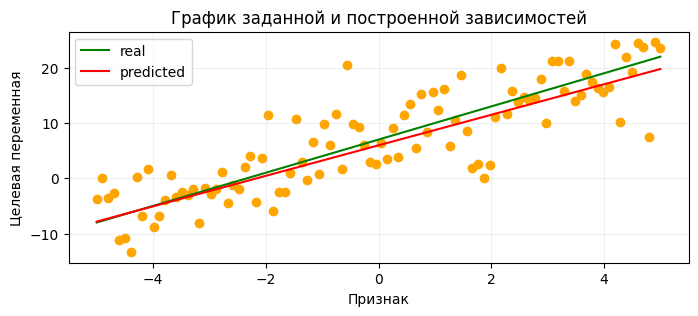

In [30]:
results_graph(model_GR, X, y, pred_gradient, target_3_7)

### Дополнительные заметки про регуляризацию.

$l_2$-регуляризация работает прекрасно и используется в большинстве случаев, но есть одна полезная особенность $l_1$-регуляризации: её применение приводит к тому, что у признаков, которые не оказывают большого влияния на ответ, вес в результате оптимизации получается равным $0$. Это позволяет удобным образом удалять признаки, слабо влияющие на таргет. Кроме того, это даёт возможность автоматически избавляться от признаков, которые участвуют в соотношениях приближённой линейной зависимости, соответственно, спасает от проблем, связанных с мультиколлинеарностью, о которых мы писали выше.

Линии уровня $l_1$-нормы – это $N$-мерные октаэдры. Точки их касания с линиями уровня лосса, скорее всего, лежат на грани размерности, меньшей $N-1$, то есть как раз в области, где часть координат равна нулю:

<img src="https://yastatic.net/s3/ml-handbook/admin/1_9_c157936d62.png" width="800" height="600">

Модели, в которых некоторые веса равны нулю, называют *разреженными*, поскольку прогноз в них зависит лишь от части признаков. Потребность в таких моделях можно возникнуть по многим причинам. Несколько примеров:
1. Может быть заведомо известно, что релевантными являются не все признаки. Очевидно, что признаки, которые не имеют отношения к задаче, надо исключать из данных, то есть производить отбор признаков. Есть много способов решения этой задачи, и $l_1$-регуляризация — один из них.
2. К модели могут выдвигаться ограничения по скорости построения предсказаний. В этом случае модель должна зависеть от небольшого количества наиболее важных признаков, и тут тоже оказывается полезной $l_1$-регуляризация.
3. В обучающей выборке объектов может быть существенно меньше, чем признаков (так называемая «проблема N ≪ p»). Поскольку параметров линейной модели при этом тоже больше, чем объектов, задача обучения оказывается некорректной — решений много, и сложно выбрать из них то, которое обладает хорошей обобщающей способностью. Решить эту проблему можно путём внедрения в процесс обучения априорного знания о том, что целевая переменная зависит от небольшого количества признаков. Такая модификация как раз может быть сделана с помощью $l_1$-регуляризатора.

Регуляризированное решение уменьшает дисперсию, но становится смещенным, т.к. минимизируется также и норма вектора параметров, что заставляет решение сдвигаться в сторону нуля. На рисунке ниже на пересечении белых пунктирных линий находится МНК-решение. Голубыми точками обозначены различные решения гребневой регрессии. Видно, что при увеличении параметра регуляризации $\lambda$ решение сдвигается в сторону нуля.

<img src="https://habrastorage.org/r/w1560/files/2f7/484/d31/2f7484d31b98416296ad3bab430854ee.png" width="500" height="500">

### n-мерные данные

In [31]:
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [32]:
regressor = MyGradientLinearRegression(lr=0.02)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

regressor.get_weights()

array([58.90641445,  7.1173846 ,  5.00001235])

In [33]:
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  417.5773531176437
Test MSE:  576.6143520009156


In [34]:
X @ [[1],[2]]

array([[-3.58745599],
       [-2.07304726],
       [-0.34316388],
       [ 1.7531856 ],
       [ 0.42589541],
       [-2.15351402],
       [ 1.27080269],
       [ 0.81561274],
       [ 4.13863557],
       [-2.81636316],
       [ 1.49003996],
       [-1.3661805 ],
       [ 2.10104121],
       [ 0.59436011],
       [-0.4199185 ],
       [ 0.39128809],
       [-0.6422926 ],
       [-2.45371561],
       [ 0.34357046],
       [ 0.36160344],
       [ 1.21960118],
       [-2.88664618],
       [ 2.32945255],
       [ 0.83341387],
       [ 1.47631213],
       [ 0.52042073],
       [ 0.10940359],
       [ 1.08957869],
       [-4.61317787],
       [ 0.22360574],
       [-3.6507334 ],
       [ 1.64950788],
       [ 2.72671143],
       [ 2.48707137],
       [ 3.87285518],
       [-2.55073765],
       [ 1.11066994],
       [ 0.24244632],
       [ 0.19745452],
       [-1.3970584 ],
       [ 1.50358376],
       [ 1.05046437],
       [ 0.43367678],
       [-1.12645008],
       [ 0.34458726],
       [ 0

In [35]:
X @ [1,2]

array([-3.58745599, -2.07304726, -0.34316388,  1.7531856 ,  0.42589541,
       -2.15351402,  1.27080269,  0.81561274,  4.13863557, -2.81636316,
        1.49003996, -1.3661805 ,  2.10104121,  0.59436011, -0.4199185 ,
        0.39128809, -0.6422926 , -2.45371561,  0.34357046,  0.36160344,
        1.21960118, -2.88664618,  2.32945255,  0.83341387,  1.47631213,
        0.52042073,  0.10940359,  1.08957869, -4.61317787,  0.22360574,
       -3.6507334 ,  1.64950788,  2.72671143,  2.48707137,  3.87285518,
       -2.55073765,  1.11066994,  0.24244632,  0.19745452, -1.3970584 ,
        1.50358376,  1.05046437,  0.43367678, -1.12645008,  0.34458726,
        0.53966275,  1.38903194,  3.01195065, -3.54398103,  1.49217292,
        0.87089986, -2.20905885, -2.25800338, -0.02347045,  1.75139365,
       -1.08618364,  1.63321849,  3.91755278,  0.47250741,  3.18127095,
       -3.29046283, -2.8157216 ,  2.96952004, -0.04489547, -2.89514945,
       -0.53326659,  2.88387275,  1.31682044,  1.47346859, -3.06

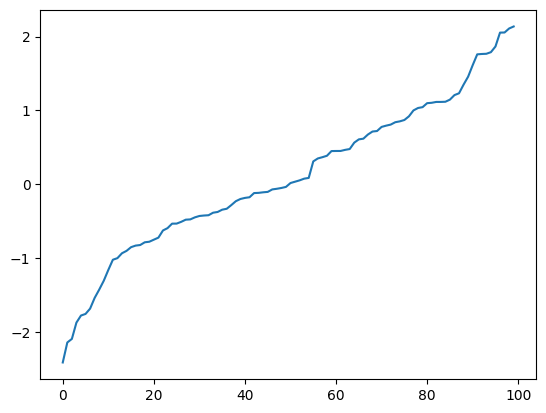

In [36]:
import numpy as np

# Задаем параметры нормального распределения
mean = 0
std_dev = 1
sample_size = 100

# Генерируем выборку из нормального распределения
sample = np.random.normal(mean, std_dev, sample_size)

plt.plot(sorted(sample))

In [37]:
def expected_value(values, probabilities):
    if len(values) != len(probabilities):
        raise ValueError("Длины списков значений и вероятностей должны совпадать")
    
    expected_val = sum([x * p for x, p in zip(values, probabilities)])
    return expected_val

# Пример использования функции
values = [1, 2, 3, 4]
probabilities = [0.1, 0.2, 0.3, 0.4]

result = expected_value(values, probabilities)
print("Математическое ожидание: ", result)

Математическое ожидание:  3.0


# Приложение

## "Распремление" поверхности весов из-за мультиколлинеарности признаков

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
X1 = np.array([100, 200, 300])
X2 = X1 / 100

y = 3*X1 + 300*X2
X = np.column_stack((X1, X2))

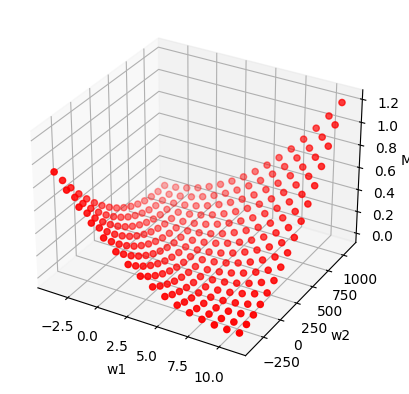

In [40]:
points = []

for w1 in np.arange(-4, 12, 1):
    for w2 in np.arange(-400, 1200, 100):
        w = [w1, w2]
        y_pred = X @ w
        mse = int(mean_squared_error(y, y_pred))
        points.append((w1, w2, mse))

w1_vals = [point[0] for point in points]
w2_vals = [point[1] for point in points]
mse_vals = [point[2] for point in points]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w1_vals, w2_vals, mse_vals, c='r', marker='o')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('MSE')

plt.show()